<a href="https://colab.research.google.com/github/SzymonCisowski/PFML_Project/blob/Classifier/Bartek_MLPClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
data2023_08 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/apartments_pl_2023_08.csv')
data2023_09 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/apartments_pl_2023_09.csv')
data2023_10 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/apartments_pl_2023_10.csv')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
data2023_10.describe()

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,clinicDistance,postOfficeDistance,kindergartenDistance,restaurantDistance,collegeDistance,pharmacyDistance,price
count,16690.000000,16690.000000,13644.000000,16448.000000,13785.000000,16690.000000,16690.000000,16690.000000,16690.000000,16669.000000,16605.000000,16665.000000,16668.000000,16637.000000,16185.000000,16661.000000,1.669000e+04
mean,58.985279,2.680228,3.268030,5.162755,1984.573957,52.047413,19.489039,4.328341,20.462912,0.417843,0.978049,0.526101,0.376593,0.357309,1.444789,0.365081,7.235462e+05
std,21.347723,0.911191,2.455211,3.201862,34.164553,1.331076,1.779749,2.879183,24.104101,0.480638,0.905555,0.515941,0.463518,0.483880,1.105216,0.476461,3.521544e+05
min,25.000000,1.000000,1.000000,1.000000,1851.000000,49.981357,14.447127,0.020000,0.000000,0.005000,0.001000,0.003000,0.002000,0.001000,0.007000,0.001000,1.526200e+05
25%,44.402500,2.000000,2.000000,3.000000,1965.000000,51.114060,18.512167,1.970000,7.000000,0.175000,0.355000,0.241000,0.157000,0.117000,0.586000,0.145000,4.800000e+05
50%,55.000000,3.000000,3.000000,4.000000,1992.000000,52.195677,19.894169,3.920000,13.000000,0.292000,0.674000,0.395000,0.266000,0.235000,1.119000,0.242000,6.590000e+05
75%,69.000000,3.000000,4.000000,6.000000,2015.000000,52.440733,20.994512,6.090000,24.000000,0.468000,1.246000,0.629000,0.423000,0.419000,2.051000,0.407000,8.700000e+05
max,150.000000,6.000000,29.000000,29.000000,2023.000000,54.606460,23.195701,16.920000,208.000000,4.818000,4.989000,4.905000,4.960000,4.985000,5.000000,4.861000,2.500000e+06


In [26]:
data = [data2023_08, data2023_09, data2023_10]
df = pd.concat(data)
print(df.shape)
df.describe()
df

(52592, 28)


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16685,1e7f4f1fdfea31eb84e071d697839632,bydgoszcz,NaN,50.12,2.0,1.0,1.0,NaN,53.129657,18.003888,...,0.250,condominium,brick,NaN,yes,no,no,no,no,360000
16686,d971c4ed3aab9919bf203e96019a678e,bydgoszcz,tenement,100.00,4.0,3.0,4.0,1910.0,53.126000,18.007900,...,0.205,condominium,brick,premium,yes,yes,no,no,yes,590000
16687,60fcbfa2a2a48ebcc2e554efba7f2729,bydgoszcz,tenement,59.10,2.0,1.0,1.0,1910.0,53.126000,18.007900,...,0.205,condominium,brick,NaN,yes,no,no,no,yes,320000
16688,cd0241b70b79aaaf767a0dd3a7cfbb31,bydgoszcz,NaN,81.07,5.0,1.0,4.0,2019.0,53.115921,17.956396,...,0.428,condominium,NaN,NaN,no,yes,yes,no,no,679000


In [27]:
df = df.drop_duplicates().reset_index(drop=True)
df

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35227,f4f6e61a07541e8397d4baff8b770e0a,bydgoszcz,tenement,135.00,5.0,2.0,3.0,1900.0,53.128550,18.009670,...,0.139,condominium,brick,NaN,no,yes,no,no,yes,970000
35228,15b7903dd521db04aae25831d5e6195d,bydgoszcz,NaN,74.00,3.0,1.0,1.0,NaN,53.105810,18.054880,...,0.278,condominium,NaN,NaN,no,no,no,no,yes,390000
35229,37c32bd102f6da4e24ae0caf366f1a9a,bydgoszcz,blockOfFlats,52.10,2.0,3.0,3.0,NaN,53.139854,18.025772,...,0.166,condominium,concreteSlab,low,no,no,no,no,yes,325000
35230,a250aefc84e4567190067f387f56e966,bydgoszcz,NaN,45.00,2.0,3.0,4.0,NaN,53.144427,17.960760,...,0.259,condominium,NaN,NaN,no,yes,no,no,yes,370000


In [28]:
tmp=df[df['ownership'] == 'udział']
print(tmp)
df=df.drop(index=tmp.index).reset_index(drop='true')
df

                                     id    city      type  squareMeters  \
27152  9e6abc01de23a1a410347d3b326e8cd5  krakow  tenement          42.0   

       rooms  floor  floorCount  buildYear   latitude  longitude  ...  \
27152    2.0    2.0         3.0     1920.0  50.050723  19.952262  ...   

       pharmacyDistance  ownership  buildingMaterial  condition  \
27152             0.369     udział             brick        low   

       hasParkingSpace  hasBalcony  hasElevator  hasSecurity  hasStorageRoom  \
27152               no         yes           no           no              no   

        price  
27152  745000  

[1 rows x 28 columns]


,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,pharmacyDistance,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,f8524536d4b09a0c8ccc0197ec9d7bde,szczecin,blockOfFlats,63.00,3.0,4.0,10.0,1980.0,53.378933,14.625296,...,0.413,condominium,concreteSlab,NaN,yes,yes,yes,no,yes,415000
1,accbe77d4b360fea9735f138a50608dd,szczecin,blockOfFlats,36.00,2.0,8.0,10.0,NaN,53.442692,14.559690,...,0.205,cooperative,concreteSlab,NaN,no,yes,yes,no,yes,395995
2,8373aa373dbc3fe7ca3b7434166b8766,szczecin,tenement,73.02,3.0,2.0,3.0,NaN,53.452222,14.553333,...,0.280,condominium,brick,NaN,no,no,no,no,no,565000
3,0a68cd14c44ec5140143ece75d739535,szczecin,tenement,87.60,3.0,2.0,3.0,NaN,53.435100,14.532900,...,0.087,condominium,brick,NaN,yes,yes,no,no,yes,640000
4,f66320e153c2441edc0fe293b54c8aeb,szczecin,blockOfFlats,66.00,3.0,1.0,3.0,NaN,53.410278,14.503611,...,0.514,condominium,NaN,NaN,no,no,no,no,no,759000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35226,f4f6e61a07541e8397d4baff8b770e0a,bydgoszcz,tenement,135.00,5.0,2.0,3.0,1900.0,53.128550,18.009670,...,0.139,condominium,brick,NaN,no,yes,no,no,yes,970000
35227,15b7903dd521db04aae25831d5e6195d,bydgoszcz,NaN,74.00,3.0,1.0,1.0,NaN,53.105810,18.054880,...,0.278,condominium,NaN,NaN,no,no,no,no,yes,390000
35228,37c32bd102f6da4e24ae0caf366f1a9a,bydgoszcz,blockOfFlats,52.10,2.0,3.0,3.0,NaN,53.139854,18.025772,...,0.166,condominium,concreteSlab,low,no,no,no,no,yes,325000
35229,a250aefc84e4567190067f387f56e966,bydgoszcz,NaN,45.00,2.0,3.0,4.0,NaN,53.144427,17.960760,...,0.259,condominium,NaN,NaN,no,yes,no,no,yes,370000


Text(0, 0.5, 'Percentages of null data')

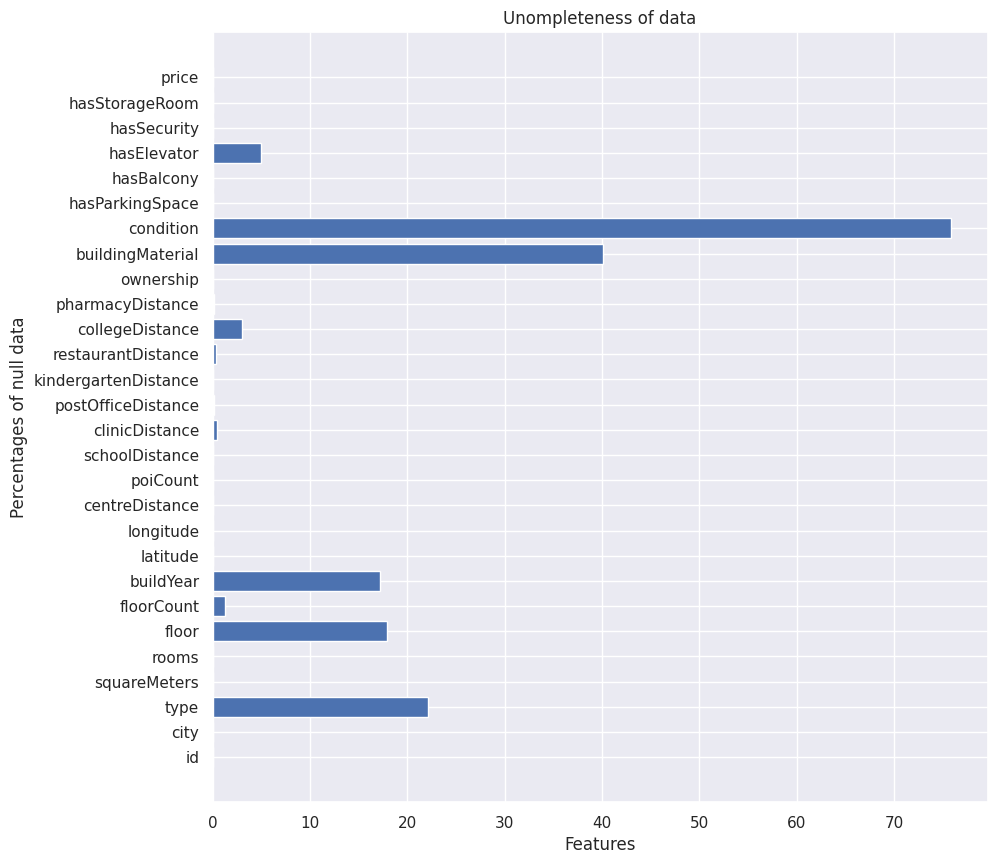

In [29]:
columns = df.columns
complete_data=[]
for i in columns:
  tmp = len(df[df[i].isnull()])/len(df)*100
  complete_data.append(tmp)

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 10))
plt.barh(columns,complete_data )
plt.title('Unompleteness of data')
plt.xlabel('Features')
plt.ylabel('Percentages of null data')



In [30]:
#df.drop(['id', 'condition', 'buildingMaterial'], axis=1, inplace=True)
df=df.drop([ 'condition', 'buildingMaterial'],axis=1).reset_index(drop='true')
df = df.dropna()


df

,id,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
5,2e190fcd6934978ca36d86ba41e842fc,szczecin,blockOfFlats,63.30,3.0,2.0,4.0,1997.0,53.463100,14.572800,...,1.102,0.377,0.745,cooperative,yes,yes,no,no,yes,499000
6,ec27024bfcd012728617a35dad2cb6b8,szczecin,blockOfFlats,47.45,2.0,2.0,10.0,1974.0,53.450232,14.562625,...,0.244,1.736,0.277,condominium,no,no,yes,no,yes,370000
7,d3e0e36529df3360849ec40168c10755,szczecin,apartmentBuilding,60.08,2.0,3.0,4.0,2009.0,53.454685,14.551520,...,0.257,1.945,0.155,condominium,no,yes,yes,no,no,629000
8,7e1981e920d763d6237c5bdcf13cf5b7,szczecin,blockOfFlats,47.76,2.0,8.0,12.0,1980.0,53.458869,14.536403,...,0.265,1.879,0.420,condominium,no,yes,yes,no,yes,399000
9,4a04a9c54d8281e3ec23df031e538d85,szczecin,tenement,72.09,4.0,2.0,3.0,1890.0,53.435092,14.559612,...,0.199,0.653,0.199,condominium,yes,no,no,no,yes,325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35192,7dba8d8440ed6d2e9ba3cf311421e6a2,bydgoszcz,apartmentBuilding,64.00,3.0,2.0,6.0,2022.0,53.146385,18.009907,...,0.334,1.589,0.468,condominium,yes,yes,yes,no,yes,665000
35194,ebb3bb689a72a70c534076b6e2338f82,bydgoszcz,tenement,79.00,3.0,4.0,4.0,1936.0,53.126580,18.010120,...,0.088,0.599,0.044,condominium,no,no,no,no,yes,530000
35212,d5f5ec7de8d71d8a598010745e5b24b1,bydgoszcz,blockOfFlats,57.00,2.0,1.0,2.0,2001.0,53.107880,17.981280,...,0.694,1.660,0.631,condominium,no,no,no,yes,yes,463900
35221,070c1838eab0bc85891b26a78caeff90,bydgoszcz,apartmentBuilding,50.00,2.0,2.0,2.0,2016.0,53.142260,17.960240,...,1.215,1.071,0.482,condominium,yes,yes,no,yes,no,450000


In [31]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(['object']).columns
cat_cols=cat_cols.drop(['type','city','ownership','id'])

df_cats = df[cat_cols].reset_index(drop=True)
cat_cols
df[df_cats.columns] = df[df_cats.columns].apply(LabelEncoder().fit_transform)
df=df.drop([ 'id'],axis=1).reset_index(drop='true')
df

,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,restaurantDistance,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price
0,szczecin,blockOfFlats,63.30,3.0,2.0,4.0,1997.0,53.463100,14.572800,4.48,...,1.102,0.377,0.745,cooperative,1,1,0,0,1,499000
1,szczecin,blockOfFlats,47.45,2.0,2.0,10.0,1974.0,53.450232,14.562625,2.99,...,0.244,1.736,0.277,condominium,0,0,1,0,1,370000
2,szczecin,apartmentBuilding,60.08,2.0,3.0,4.0,2009.0,53.454685,14.551520,3.53,...,0.257,1.945,0.155,condominium,0,1,1,0,0,629000
3,szczecin,blockOfFlats,47.76,2.0,8.0,12.0,1980.0,53.458869,14.536403,4.27,...,0.265,1.879,0.420,condominium,0,1,1,0,1,399000
4,szczecin,tenement,72.09,4.0,2.0,3.0,1890.0,53.435092,14.559612,1.30,...,0.199,0.653,0.199,condominium,1,0,0,0,1,325000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,bydgoszcz,apartmentBuilding,64.00,3.0,2.0,6.0,2022.0,53.146385,18.009907,2.78,...,0.334,1.589,0.468,condominium,1,1,1,0,1,665000
18259,bydgoszcz,tenement,79.00,3.0,4.0,4.0,1936.0,53.126580,18.010120,0.81,...,0.088,0.599,0.044,condominium,0,0,0,0,1,530000
18260,bydgoszcz,blockOfFlats,57.00,2.0,1.0,2.0,2001.0,53.107880,17.981280,2.04,...,0.694,1.660,0.631,condominium,0,0,0,1,1,463900
18261,bydgoszcz,apartmentBuilding,50.00,2.0,2.0,2.0,2016.0,53.142260,17.960240,3.52,...,1.215,1.071,0.482,condominium,1,1,0,1,0,450000


In [32]:
df['priceForSquareMeters']=df['price']/df['squareMeters']
df


,city,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,...,collegeDistance,pharmacyDistance,ownership,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,priceForSquareMeters
0,szczecin,blockOfFlats,63.30,3.0,2.0,4.0,1997.0,53.463100,14.572800,4.48,...,0.377,0.745,cooperative,1,1,0,0,1,499000,7883.096367
1,szczecin,blockOfFlats,47.45,2.0,2.0,10.0,1974.0,53.450232,14.562625,2.99,...,1.736,0.277,condominium,0,0,1,0,1,370000,7797.681770
2,szczecin,apartmentBuilding,60.08,2.0,3.0,4.0,2009.0,53.454685,14.551520,3.53,...,1.945,0.155,condominium,0,1,1,0,0,629000,10469.374168
3,szczecin,blockOfFlats,47.76,2.0,8.0,12.0,1980.0,53.458869,14.536403,4.27,...,1.879,0.420,condominium,0,1,1,0,1,399000,8354.271357
4,szczecin,tenement,72.09,4.0,2.0,3.0,1890.0,53.435092,14.559612,1.30,...,0.653,0.199,condominium,1,0,0,0,1,325000,4508.253572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,bydgoszcz,apartmentBuilding,64.00,3.0,2.0,6.0,2022.0,53.146385,18.009907,2.78,...,1.589,0.468,condominium,1,1,1,0,1,665000,10390.625000
18259,bydgoszcz,tenement,79.00,3.0,4.0,4.0,1936.0,53.126580,18.010120,0.81,...,0.599,0.044,condominium,0,0,0,0,1,530000,6708.860759
18260,bydgoszcz,blockOfFlats,57.00,2.0,1.0,2.0,2001.0,53.107880,17.981280,2.04,...,1.660,0.631,condominium,0,0,0,1,1,463900,8138.596491
18261,bydgoszcz,apartmentBuilding,50.00,2.0,2.0,2.0,2016.0,53.142260,17.960240,3.52,...,1.071,0.482,condominium,1,1,0,1,0,450000,9000.000000


In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder1 = encoder.fit_transform(df[['city']])
df = pd.concat([df, pd.DataFrame(encoder1, columns=encoder.categories_[0])], axis=1)
encoder = OneHotEncoder(sparse=False)
encoder1 = encoder.fit_transform(df[['type']])
df = pd.concat([df, pd.DataFrame(encoder1, columns=encoder.categories_[0])], axis=1)
encoder = OneHotEncoder(sparse=False)
encoder1 = encoder.fit_transform(df[['ownership']])
df = pd.concat([df, pd.DataFrame(encoder1, columns=encoder.categories_[0])], axis=1)
df
df.columns

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Index(['city', 'type', 'squareMeters', 'rooms', 'floor', 'floorCount',
       'buildYear', 'latitude', 'longitude', 'centreDistance', 'poiCount',
       'schoolDistance', 'clinicDistance', 'postOfficeDistance',
       'kindergartenDistance', 'restaurantDistance', 'collegeDistance',
       'pharmacyDistance', 'ownership', 'hasParkingSpace', 'hasBalcony',
       'hasElevator', 'hasSecurity', 'hasStorageRoom', 'price',
       'priceForSquareMeters', 'bialystok', 'bydgoszcz', 'czestochowa',
       'gdansk', 'gdynia', 'katowice', 'krakow', 'lodz', 'lublin', 'poznan',
       'radom', 'rzeszow', 'szczecin', 'warszawa', 'wroclaw',
       'apartmentBuilding', 'blockOfFlats', 'tenement', 'condominium',
       'cooperative'],
      dtype='object')

In [34]:
# X_train=X_train.drop(['squareMeters','price'],axis=1)
df=df.drop(['city','type','ownership'],axis=1)
df
#think about drop latitude longitude columns due to city localization

,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,schoolDistance,...,radom,rzeszow,szczecin,warszawa,wroclaw,apartmentBuilding,blockOfFlats,tenement,condominium,cooperative
0,63.30,3.0,2.0,4.0,1997.0,53.463100,14.572800,4.48,10.0,0.079,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,47.45,2.0,2.0,10.0,1974.0,53.450232,14.562625,2.99,18.0,0.327,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,60.08,2.0,3.0,4.0,2009.0,53.454685,14.551520,3.53,8.0,0.572,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,47.76,2.0,8.0,12.0,1980.0,53.458869,14.536403,4.27,6.0,0.345,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,72.09,4.0,2.0,3.0,1890.0,53.435092,14.559612,1.30,22.0,0.232,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18258,64.00,3.0,2.0,6.0,2022.0,53.146385,18.009907,2.78,2.0,1.021,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
18259,79.00,3.0,4.0,4.0,1936.0,53.126580,18.010120,0.81,44.0,0.058,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
18260,57.00,2.0,1.0,2.0,2001.0,53.107880,17.981280,2.04,0.0,0.571,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18261,50.00,2.0,2.0,2.0,2016.0,53.142260,17.960240,3.52,4.0,0.535,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
from sklearn.model_selection import train_test_split
tmp1=[df['hasBalcony'],df['hasParkingSpace'],df['hasElevator']]
target=pd.DataFrame(tmp1).transpose()
data=df.drop(['hasElevator','hasParkingSpace','hasBalcony'],axis=1)
X_train, X_test,Y_train, Y_test = train_test_split(data,target,test_size=0.4,random_state=21)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test,Y_test,test_size=0.5,random_state=21)
print(len(X_train))
print(len(X_test))
print(len(X_valid))
print(len(Y_train))
X_train.describe()
target

10957
3653
3653
10957


,hasBalcony,hasParkingSpace,hasElevator
0,1,1,0
1,0,0,1
2,1,0,1
3,1,0,1
4,0,1,0
...,...,...,...
18258,1,1,1
18259,0,0,0
18260,0,0,0
18261,1,1,0


<Axes: >

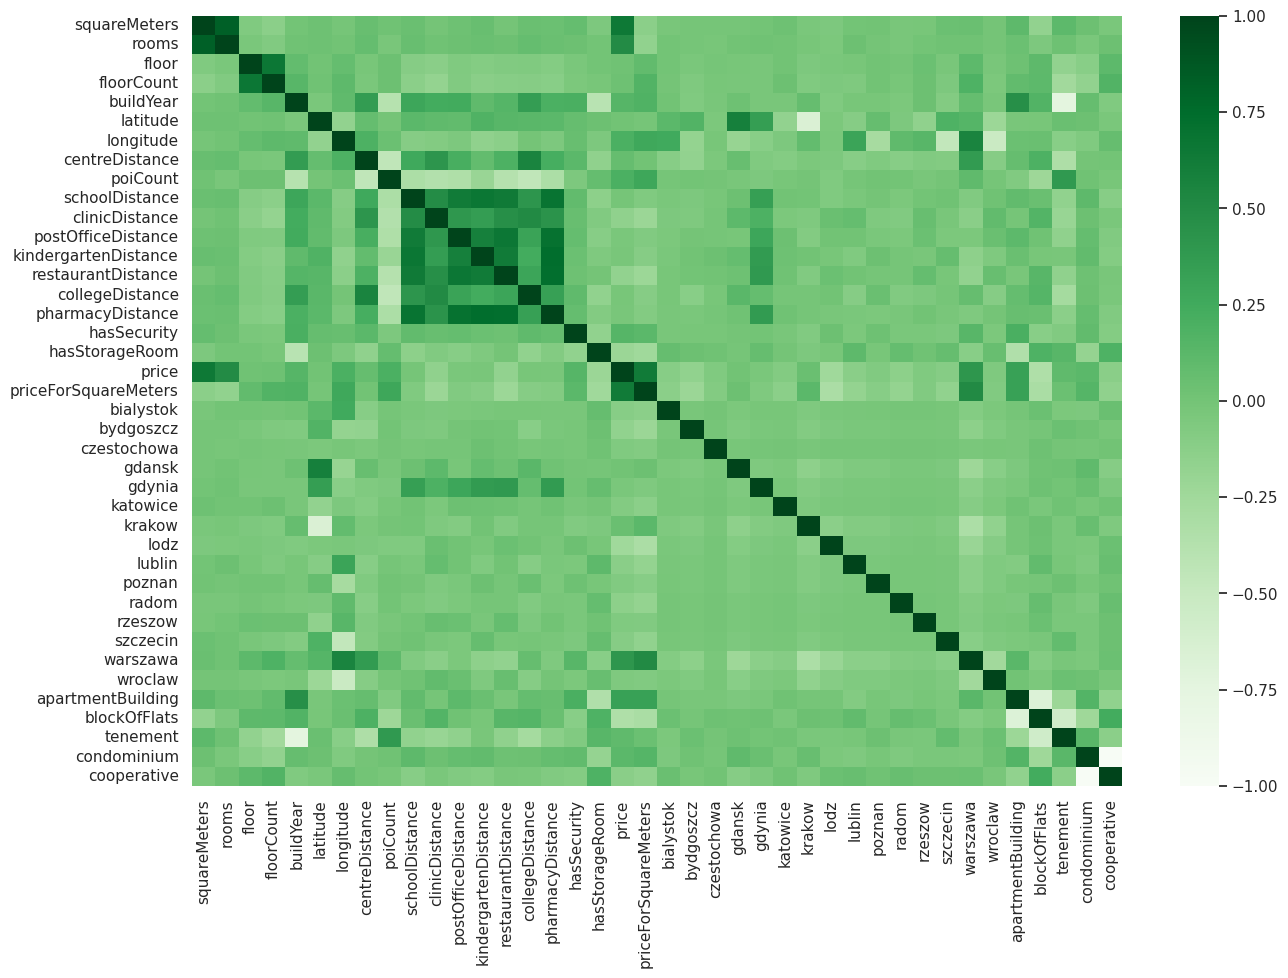

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = X_train.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, cmap = 'Greens')

In [37]:
import seaborn as sns
sns.set_theme()
sns.boxplot(X_train,x='hasElevator',y='floorCount')
X_train.hist(figsize=[15,10])

ValueError: ignored

In [19]:
tmp=X_train[X_train['hasElevator'] == 0]
tmp=tmp[tmp['floorCount'] > 4]
X_train=X_train.drop(index=tmp.index).reset_index(drop='true')
X_train

KeyError: ignored

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(hidden_layer_sizes=(1,1,6), random_state=21, max_iter=1000, solver='adam',activation='identity',learning_rate='constant',early_stopping=True,batch_size=15,shuffle=True,beta_1=0.95,beta_2=0.999999999999999)
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_valid)
acc_train_elevator = accuracy_score(Y_train['hasElevator'], y_pred_train[:,2])
acc_val_elevator = accuracy_score(Y_valid['hasElevator'], y_pred[:,2])
acc_train_parking = accuracy_score(Y_train['hasParkingSpace'], y_pred_train[:,1])
acc_val_parking = accuracy_score(Y_valid['hasParkingSpace'], y_pred[:,1])
acc_train_balcony = accuracy_score(Y_train['hasBalcony'], y_pred_train[:,0])
acc_val_balcony = accuracy_score(Y_valid['hasBalcony'], y_pred[:,0])
print(acc_train_elevator,acc_val_elevator,acc_train_parking,acc_val_parking,acc_train_balcony,acc_val_balcony)

0.833257278452131 0.8310977278948809 0.6936205165647531 0.6912127018888585 0.6854978552523501 0.6876539830276485


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_valid)
acc_train_elevator = accuracy_score(Y_train['hasElevator'], y_pred_train[:,0])
acc_val_elevator = accuracy_score(Y_valid['hasElevator'], y_pred[:,0])
acc_train_parking = accuracy_score(Y_train['hasParkingSpace'], y_pred_train[:,0])
acc_val_parking = accuracy_score(Y_valid['hasParkingSpace'], y_pred[:,0])
acc_train_balcony = accuracy_score(Y_train['hasBalcony'], y_pred_train[:,0])
acc_val_balcony = accuracy_score(Y_valid['hasBalcony'], y_pred[:,0])
print(acc_train_elevator,acc_val_elevator,acc_train_parking,acc_val_parking,acc_train_balcony,acc_val_balcony)

0.5481427398010404 0.5395565288803723 0.3177877156155882 0.3219271831371476 0.691977731130784 0.6903914590747331


In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, Y_train)
y_pred_train = clf.predict(X_train)
y_pred = clf.predict(X_valid)
acc_train_elevator = accuracy_score(Y_train['hasElevator'], y_pred_train[:,0])
acc_val_elevator = accuracy_score(Y_valid['hasElevator'], y_pred[:,0])
acc_train_parking = accuracy_score(Y_train['hasParkingSpace'], y_pred_train[:,0])
acc_val_parking = accuracy_score(Y_valid['hasParkingSpace'], y_pred[:,0])
acc_train_balcony = accuracy_score(Y_train['hasBalcony'], y_pred_train[:,0])
acc_val_balcony = accuracy_score(Y_valid['hasBalcony'], y_pred[:,0])
print(acc_train_elevator,acc_val_elevator,acc_train_parking,acc_val_parking,acc_train_balcony,acc_val_balcony)

0.6984576070092179 0.6920339447029838 0.42739801040430775 0.4245825349028196 0.7225517933740987 0.7289898713386258
